In [1]:
# First I have imported the libraries and data
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from pandas.plotting import parallel_coordinates
from plotly.subplots import make_subplots

df = pd.read_csv("players_list.csv")
df.head()

Unnamed: 0             Player  Match_played  Starts  Minutes_played  Gls  \
0           0  Emiliano Martínez             7       7             690    0   
1           1       Lionel Messi             7       7             690    7   
2           2   Nicolás Otamendi             7       7             690    0   
3           3    Rodrigo De Paul             7       7             599    0   
4           4      Nahuel Molina             7       6             567    1   

   Ast  Shots  shots_on_target  goals_per_shot  ...  penalty_kick_won  \
0    0      0                0             NaN  ...               0.0   
1    3     27               13            0.11  ...               1.0   
2    1      1                0            0.00  ...               0.0   
3    0      7                3            0.00  ...               0.0   
4    1      2                1            0.50  ...               0.0   

   penalty_kick_conceded  own_goal  aerial_duo_won  aerial_duo_lost  Pos  Age  \
0                    0.0         0             2.0              0.0   GK   29   
1                    0.0         0             2.0              7.0   FW   34   
2                    1.0         0            21.0             13.0   DF   34   
3                    0.0         0             2.0              3.0   MF   28   
4                    0.0         0             0.0              6.0   DF   24   

   Club_country             Club       Team  
0           eng      Aston Villa  Argentina  
1            fr        Paris S-G  Argentina  
2            pt          Benfica  Argentina  
3            es  Atlético Madrid  Argentina  
4            es  Atlético Madrid  Argentina  

[5 rows x 42 columns]

In [2]:
# Some exploration into the data

df.shape

(680, 42)

So we can see that this dataset have 680 rows and 42 columns

In [3]:
df.describe()

Unnamed: 0  Match_played      Starts  Minutes_played         Gls  \
count  680.000000    680.000000  680.000000      680.000000  680.000000   
mean   339.500000      2.933824    2.070588      191.194118    0.250000   
std    196.443376      1.520611    1.753856      147.774808    0.698726   
min      0.000000      1.000000    0.000000        1.000000    0.000000   
25%    169.750000      2.000000    1.000000       68.000000    0.000000   
50%    339.500000      3.000000    2.000000      173.000000    0.000000   
75%    509.250000      4.000000    3.000000      270.000000    0.000000   
max    679.000000      7.000000    7.000000      690.000000    8.000000   

              Ast       Shots  shots_on_target  goals_per_shot  \
count  680.000000  680.000000       680.000000      431.000000   
mean     0.177941    2.107353         0.705882        0.097448   
std      0.487652    3.031781         1.337780        0.215148   
min      0.000000    0.000000         0.000000        0.000000   
25%      0.000000    0.000000         0.000000        0.000000   
50%      0.000000    1.000000         0.000000        0.000000   
75%      0.000000    3.000000         1.000000        0.095000   
max      3.000000   29.000000        13.000000        1.000000   

       goals_per_shot_on_target  ...  fouls_commited  fouls_drawn     offside  \
count                247.000000  ...      680.000000   680.000000  680.000000   
mean                   0.302794  ...        2.351471     2.238235    0.373529   
std                    0.386570  ...        2.614393     2.891103    0.864215   
min                    0.000000  ...        0.000000     0.000000    0.000000   
25%                    0.000000  ...        0.000000     0.000000    0.000000   
50%                    0.000000  ...        2.000000     1.000000    0.000000   
75%                    0.500000  ...        3.000000     3.000000    0.000000   
max                    1.000000  ...       17.000000    22.000000    7.000000   

          crosses  penalty_kick_won  penalty_kick_conceded    own_goal  \
count  680.000000        677.000000             677.000000  680.000000   
mean     3.201471          0.028065               0.033973    0.002941   
std      5.562789          0.165281               0.181295    0.054193   
min      0.000000          0.000000               0.000000    0.000000   
25%      0.000000          0.000000               0.000000    0.000000   
50%      1.000000          0.000000               0.000000    0.000000   
75%      4.000000          0.000000               0.000000    0.000000   
max     40.000000          1.000000               1.000000    1.000000   

       aerial_duo_won  aerial_duo_lost         Age  
count      677.000000       677.000000  680.000000  
mean         2.553914         2.550960   26.586765  
std          3.339578         2.904162    4.161129  
min          0.000000         0.000000   17.000000  
25%          0.000000         0.000000   24.000000  
50%          1.000000         2.000000   26.000000  
75%          4.000000         4.000000   29.000000  
max         21.000000        17.000000   39.000000  

[8 rows x 37 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                680 non-null    int64  
 1   Player                    680 non-null    object 
 2   Match_played              680 non-null    int64  
 3   Starts                    680 non-null    int64  
 4   Minutes_played            680 non-null    int64  
 5   Gls                       680 non-null    int64  
 6   Ast                       680 non-null    int64  
 7   Shots                     680 non-null    int64  
 8   shots_on_target           680 non-null    int64  
 9   goals_per_shot            431 non-null    float64
 10  goals_per_shot_on_target  247 non-null    float64
 11  non_penalty_goals         680 non-null    int64  
 12  penalty_goal              680 non-null    int64  
 13  CrdY                      680 non-null    int64  
 14  CrdR      

# Let's See how many countries took part in FIFA Football World Cup 2022?

In [5]:
df['Team'].unique()

array(['Argentina', 'France', 'Croatia', 'Morocco', 'Netherlands',
       'England', 'Brazil', 'Portugal', 'Japan', 'Senegal', 'Australia',
       'Switzerland', 'Spain', 'United States', 'Poland',
       'Korea Republic', 'Germany', 'Ecuador', 'Cameroon', 'Uruguay',
       'Tunisia', 'Mexico', 'Belgium', 'Ghana', 'Saudi Arabia', 'IR Iran',
       'Costa Rica', 'Denmark', 'Serbia', 'Wales', 'Canada', 'Qatar'],
      dtype=object)

In [6]:
number_of_teams = len(df['Team'].unique())
print("The total numbers of country which took part in the FIFA 2022 world cup are:", number_of_teams)

The total numbers of country which took part in the FIFA 2022 world cup are: 32


In [7]:
df.isnull().sum()

Unnamed: 0                    0
Player                        0
Match_played                  0
Starts                        0
Minutes_played                0
Gls                           0
Ast                           0
Shots                         0
shots_on_target               0
goals_per_shot              249
goals_per_shot_on_target    433
non_penalty_goals             0
penalty_goal                  0
CrdY                          0
CrdR                          0
pass_comp                     3
pass_attempt                  3
pass_comp%                    6
tackles_made                  3
successful_tackles            0
Blocks                        3
interceptions                 0
clearence                     3
Err                           3
Touches                       3
successful_dribbles           3
dribbles_attempted            3
successful_dribbles%        245
fouls_commited                0
fouls_drawn                   0
offside                       0
crosses 

So we saw that there are some null values in various columns but it is common because in football players play as per their positions and roles in the field, so it is common that a player from a specific postion will not show all attributes as for Example player "Nicolás Otamendi" is a player in the defense (DF) position, so his goals (Gls) are showing 0 and it is normal for a player not to score goals but to prevent goals and that's why his blocks, clearances are showing values.
  

<AxesSubplot:>

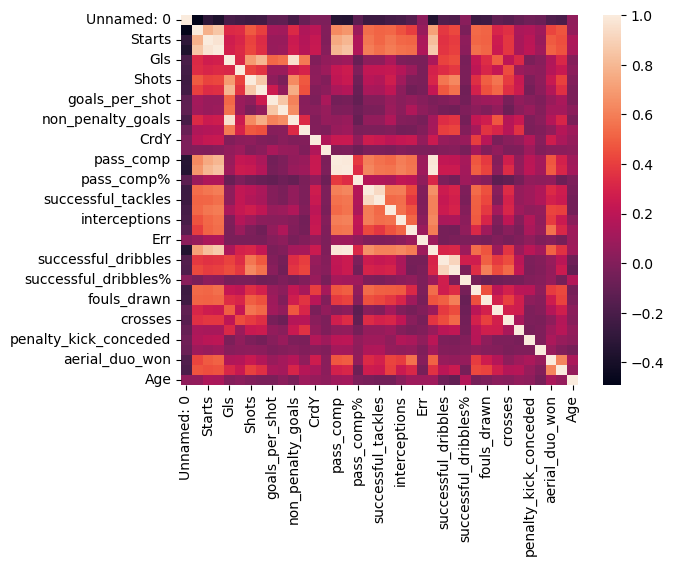

In [8]:
# Let's explore some intitial correalation between features
sns.heatmap(df.corr())

In [9]:
df.corr()

Unnamed: 0  Match_played    Starts  Minutes_played  \
Unnamed: 0                  1.000000     -0.490549 -0.309573       -0.368539   
Match_played               -0.490549      1.000000  0.778739        0.848660   
Starts                     -0.309573      0.778739  1.000000        0.965453   
Minutes_played             -0.368539      0.848660  0.965453        1.000000   
Gls                        -0.202565      0.326088  0.269201        0.280319   
Ast                        -0.225942      0.339639  0.309023        0.328026   
Shots                      -0.242663      0.486162  0.415141        0.429074   
shots_on_target            -0.232980      0.403811  0.334010        0.342593   
goals_per_shot             -0.126007      0.116687  0.076403        0.069960   
goals_per_shot_on_target   -0.122046      0.105231  0.078123        0.086830   
non_penalty_goals          -0.205807      0.326183  0.253526        0.261712   
penalty_goal               -0.084916      0.151189  0.169368        0.182824   
CrdY                       -0.015626      0.195284  0.231851        0.240299   
CrdR                       -0.013421      0.003350 -0.003098        0.012401   
pass_comp                  -0.337401      0.637517  0.748612        0.794798   
pass_attempt               -0.341138      0.675461  0.791300        0.837237   
pass_comp%                 -0.130021      0.085859  0.151147        0.161234   
tackles_made               -0.257068      0.543468  0.569544        0.594768   
successful_tackles         -0.248619      0.513188  0.521488        0.549360   
Blocks                     -0.217767      0.524557  0.574308        0.590212   
interceptions              -0.203893      0.461795  0.526662        0.556883   
clearence                  -0.154188      0.397278  0.513323        0.544387   
Err                         0.030215      0.074056  0.142806        0.150960   
Touches                    -0.351865      0.715367  0.823268        0.869127   
successful_dribbles        -0.168322      0.382079  0.356748        0.365697   
dribbles_attempted         -0.176865      0.432040  0.388740        0.402446   
successful_dribbles%        0.024714     -0.020488  0.044061        0.031018   
fouls_commited             -0.250052      0.529319  0.520052        0.546712   
fouls_drawn                -0.238431      0.511456  0.509324        0.520005   
offside                    -0.122613      0.309100  0.261445        0.250981   
crosses                    -0.146816      0.352233  0.373811        0.375959   
penalty_kick_won           -0.094811      0.142118  0.130318        0.126929   
penalty_kick_conceded      -0.064572      0.157687  0.191804        0.203570   
own_goal                   -0.082036      0.091725  0.075288        0.098317   
aerial_duo_won             -0.174930      0.418102  0.486916        0.506957   
aerial_duo_lost            -0.195327      0.469373  0.448455        0.463340   
Age                         0.050901      0.057818  0.147282        0.136834   

                               Gls       Ast     Shots  shots_on_target  \
Unnamed: 0               -0.202565 -0.225942 -0.242663        -0.232980   
Match_played              0.326088  0.339639  0.486162         0.403811   
Starts                    0.269201  0.309023  0.415141         0.334010   
Minutes_played            0.280319  0.328026  0.429074         0.342593   
Gls                       1.000000  0.314446  0.692270         0.792513   
Ast                       0.314446  1.000000  0.413410         0.360277   
Shots                     0.692270  0.413410  1.000000         0.858581   
shots_on_target           0.792513  0.360277  0.858581         1.000000   
goals_per_shot            0.526255  0.082697  0.044147         0.260415   
goals_per_shot_on_target  0.556852  0.082227 -0.024020         0.051345   
non_penalty_goals         0.957893  0.260537  0.635841         0.761241   
penalty_goal              0.583556  0.298520  0.481133         0.456541   
CrdY      

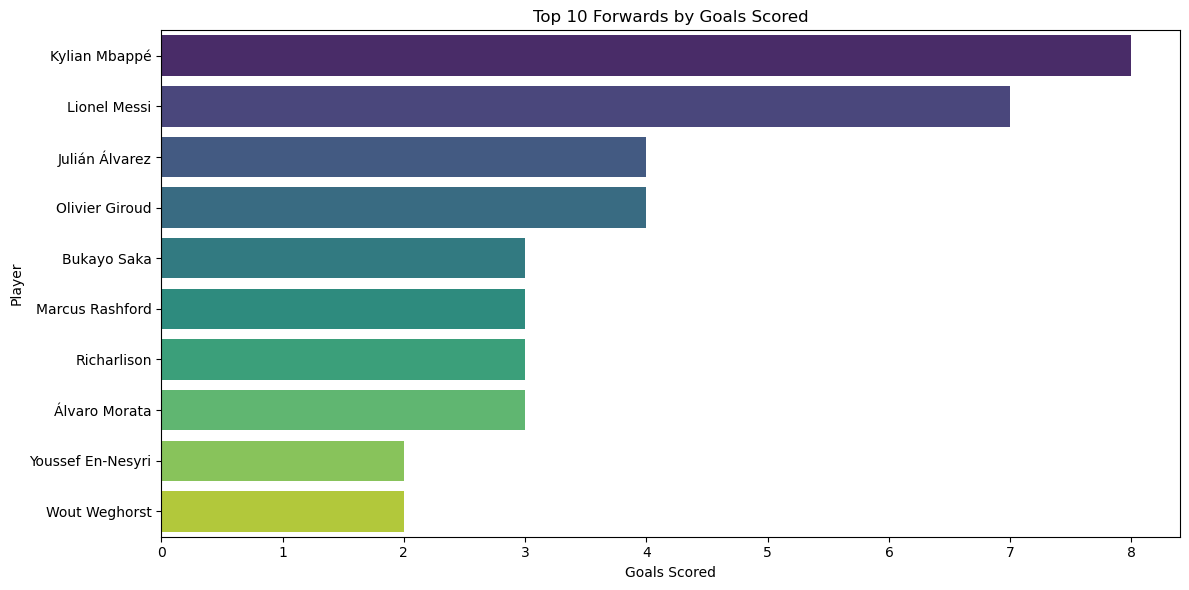

In [10]:
# Let's find out which players have scored most goals
def visualize_top_players(df, metric, position, title, ylabel, save_as=None):
    plt.figure(figsize=(12, 6))
    top_10_players = df[df['Pos'] == position].nlargest(10, metric).sort_values(metric, ascending=False)
    sns.barplot(x=metric, y='Player', data=top_10_players, palette='viridis')
    plt.title(title)
    plt.xlabel(ylabel)
    plt.ylabel('Player')
    plt.tight_layout()
    if save_as:
        plt.savefig(save_as, dpi=300)
    plt.show()
visualize_top_players(df, 'Gls', 'FW', 'Top 10 Forwards by Goals Scored', 'Goals Scored')

# First We will find out top 10 players according to the total goals, total shot, Assists, Completed passes, Touches and successful dribbles. And then based on this technical skills we will answer a question. This time FIFA awarded Golden Ball award to Lionel Messi which are given to the best players of World Cup which is mostly based on the above skills.


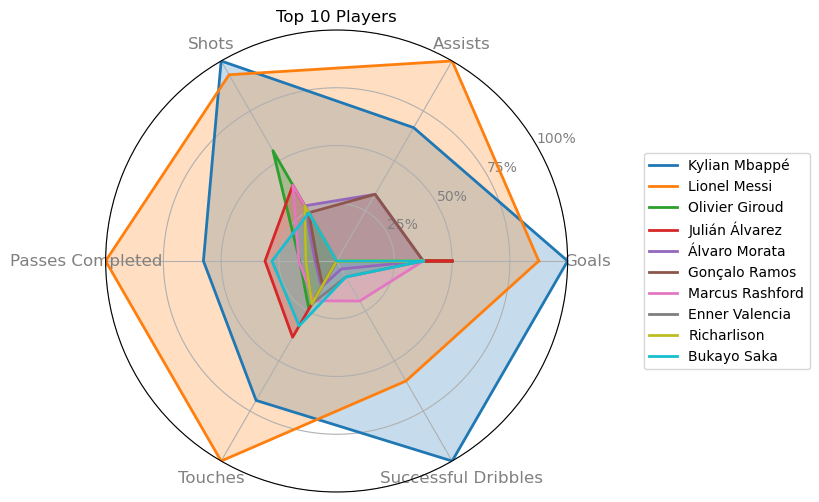

In [11]:
# We want to find out players based on "Goals", "Assists", "Shots", "Passes Completed", "Touches", "Successful Dribbles"
# First selecting top 10 players based on the required attributes
top_players = df.nlargest(10, ["Gls", "Ast", "Shots", "pass_comp", "Touches", "successful_dribbles"])

# Normalized the data
normalized_top_players = top_players[["Gls", "Ast", "Shots", "pass_comp", "Touches", "successful_dribbles"]].apply(lambda x: x / x.max(), axis=0)

# Created a radar chart as below:

attributes = ["Goals", "Assists", "Shots", "Passes Completed", "Touches", "Successful Dribbles"]
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], attributes, color="grey", size=12)
ax.set_rlabel_position(30)
plt.yticks([0.25, 0.5, 0.75, 1], ["25%", "50%", "75%", "100%"], color="grey", size=10)
plt.ylim(0, 1)

for index, row in normalized_top_players.iterrows():
    stats = row.tolist()
    stats += stats[:1]
    ax.plot(angles, stats, linewidth=2, label=top_players.loc[index, "Player"])
    ax.fill(angles, stats, alpha=0.25)

plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.title("Top 10 Players")
plt.show()


In [12]:
top_players = top_players.reset_index()
top_players = top_players.drop(columns = 'index')
top_players = top_players.drop(columns = 'Unnamed: 0')

In [13]:
top_players = top_players[["Player", "Gls", "Ast", "Shots", "pass_comp", "Touches", "successful_dribbles"]]

In [14]:
top_players

Player  Gls  Ast  Shots  pass_comp  Touches  successful_dribbles
0    Kylian Mbappé    8    2     29      173.0    322.0                 25.0
1     Lionel Messi    7    3     27      300.0    462.0                 15.0
2   Olivier Giroud    4    0     16       48.0    111.0                  0.0
3   Julián Álvarez    4    0     11       93.0    176.0                  0.0
4    Álvaro Morata    3    1      8       28.0     60.0                  1.0
5    Gonçalo Ramos    3    1      7       25.0     56.0                  0.0
6  Marcus Rashford    3    0     11       49.0     92.0                  5.0
7   Enner Valencia    3    0      8       40.0     99.0                  2.0
8      Richarlison    3    0      8       40.0     99.0                  0.0
9      Bukayo Saka    3    0      7       84.0    150.0                  2.0

In [15]:

# Now I would like to find out the contribution of Lionel Messi to Team Argentina based on the same metrics taken above

df_messi = df[(df['Player'] == 'Lionel Messi') & (df['Team'] == 'Argentina')]
metrics = ['Gls', 'Ast', 'Shots', 'pass_comp', 'Touches', 'successful_dribbles']
values = df_messi[metrics].values[0]

# Calculated the overall performance of Argentina's team in the selected metrics
df_team = df[df['Team'] == 'Argentina']
total_values = df_team[metrics].sum().values
max_values = df[metrics].max().values

# Created the radar chart as below:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=total_values,
    theta=metrics,
    fill='toself',
    name='Argentina',
    line_color='blue'
))

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=metrics,
    fill='toself',
    name='Lionel Messi',
    line_color='red'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max_values.max()]
        )
    ),
    showlegend=True,
    title={
        'text': 'Lionel Messi Contribution to Argentina Team Performance',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=50, r=50, t=100, b=50)
)

fig.show()


In [16]:
# And now I would like to find out the contribution of Kylian Mbappe to Team France

df_mbappe = df[(df['Player'] == 'Kylian Mbappé') & (df['Team'] == 'France')]
metrics = ['Gls', 'Ast', 'Shots', 'pass_comp', 'Touches', 'successful_dribbles']
values = df_mbappe[metrics].values[0]

# Calculated the overall performance of France's team in the selected metrics
df_team = df[df['Team'] == 'France']
total_values = df_team[metrics].sum().values
max_values = df[metrics].max().values

# Created the radar chart as below:

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=total_values,
    theta=metrics,
    fill='toself',
    name='France',
    line_color='blue'
))

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=metrics,
    fill='toself',
    name='Kylian Mbappé',
    line_color='red'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max_values.max()]
        )
    ),
    showlegend=True,
    title={
        'text': 'Kylian Mbappé Contribution to France Team Performance',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=50, r=50, t=100, b=50)
)

fig.show()

# So We got the top 10 players according to the total goals, total shot, Assists, Completed passes, Touches and successful dribbles.

# 1) Amongst them, Kylian Mbappe is the player who had most goals, completed most dribbles successfully and had most shots amongst the players.

# 2) Lionel Messi had the 2nd highest goals, most assits, had the most passes completed and most touches on the ball amongst the players.

# 3) No other forward players went nearly to the performance of Kylian Mbappe or Lionel Messi in this case when considered the above attributes.

# 4) Here, the competition between Kylian Mbappe and Lionel Messi is very tough. We know that FIFA awarded the Golden Ball to Lionel Messi as the best player of the tournament. Many debates that Kylian Mbappe was the most deserving player for Golden Boot though. Still we can see that Mbappe had most goals, successfull dribbles and most shots but Lionel Messi had most assists, most passes completed, most touches, he is only 1 goal short then Mbappe, and finally he had nearly as many shorts as Mbappe. Moreover Lionel Messi became the FIFA World Cup winner this time. 

# 5) If we compare the contribution of Lionel Messi to Argentina team's overall performance we can see that he also outperformed Kylian Mbappe because Messi contributed more to the success of his team but compared to that Mbappe contributed less which was a crucial factor behind the secret of Argentina's World Cup win.

#So I think FIFA awarded the Golden Ball to Lionel Messi when considering all of this facts and was a fair decision. 

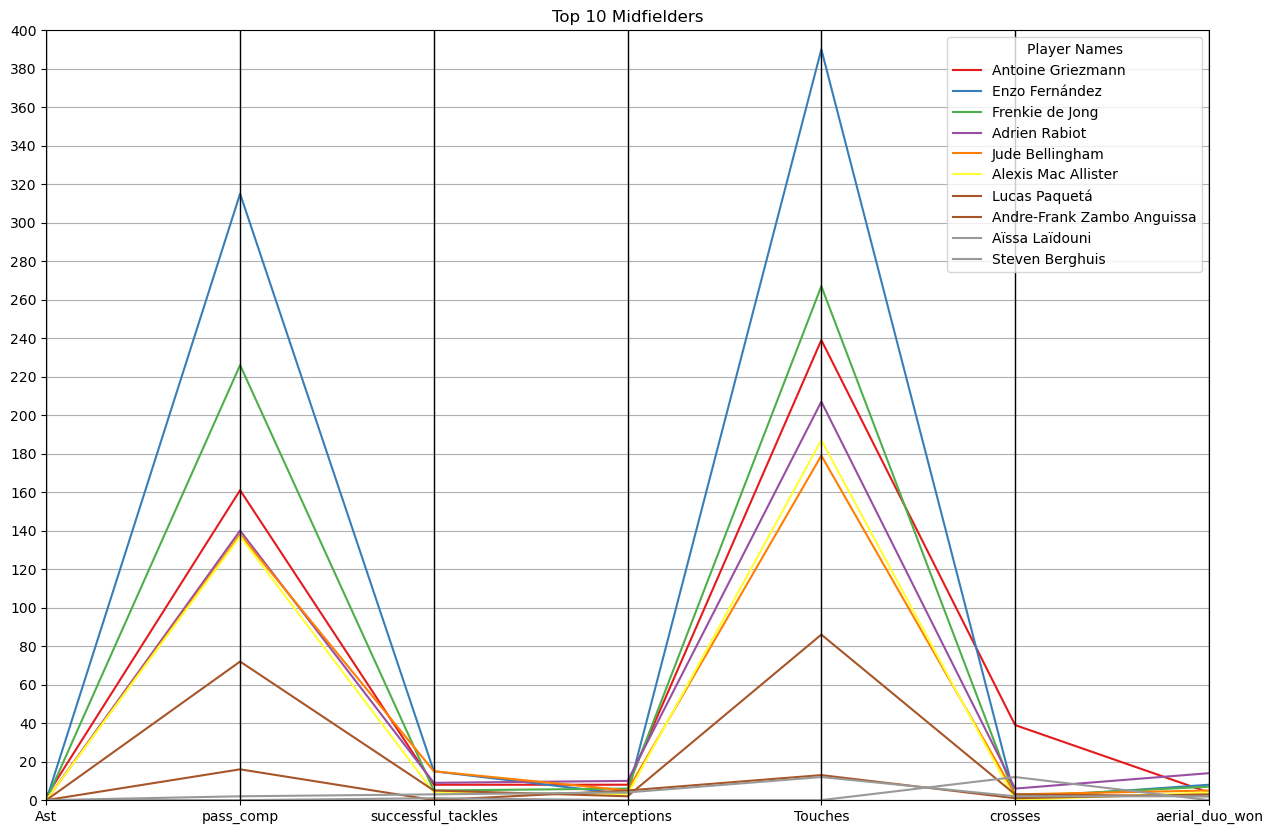

In [17]:
# Now I want to find the the top 10 midfield players of the FIFA World cup 2022 

midfielders = df[df['Pos'] == 'MF']

# Selected the top 10 midfielders based on the sum of the chosen attributes
top_midfielders = midfielders.nlargest(10, ['Ast', 'pass_comp', 'successful_tackles', 'interceptions', 'Touches', 'crosses', 'aerial_duo_won'], keep='first')
columns = ['Player', 'Ast', 'pass_comp', 'successful_tackles', 'interceptions', 'Touches', 'crosses', 'aerial_duo_won']
top_midfielders = top_midfielders[columns]

# Created a custom normalization function
def custom_normalize(df):
    result = df.copy()
    for column in df.columns:
        if column != 'Player':
            min_val = df[column].min()
            result[column] = df[column] - min_val
    return result

# Normalized the data with the custom function
normalized_top_midfielders = custom_normalize(top_midfielders)

# Created the parallel coordinates plot in below:
fig, ax = plt.subplots(figsize=(15, 10))
parallel_coordinates(normalized_top_midfielders, 'Player', ax=ax, colormap='Set1')

# Customized the plot
ax.set_xticklabels(columns[1:])
ax.set_title('Top 10 Midfielders')
ax.legend().set_title('Player Names')
y_tick_interval = 20
y_min = np.floor(normalized_top_midfielders.iloc[:, 1:].min().min() / y_tick_interval) * y_tick_interval
y_max = np.ceil(normalized_top_midfielders.iloc[:, 1:].max().max() / y_tick_interval) * y_tick_interval
ax.set_ylim(y_min, y_max)
ax.yaxis.set_ticks(np.arange(y_min, y_max + y_tick_interval, y_tick_interval))

plt.show()

In [18]:
top_midfielders = top_midfielders.reset_index()
top_midfielders = top_midfielders.drop(columns = 'index')

In [19]:
top_midfielders

Player  Ast  pass_comp  successful_tackles  \
0           Antoine Griezmann    3      258.0                   8   
1              Enzo Fernández    1      412.0                  15   
2             Frenkie de Jong    1      323.0                   5   
3               Adrien Rabiot    1      237.0                   9   
4             Jude Bellingham    1      235.0                  15   
5         Alexis Mac Allister    1      234.0                   4   
6               Lucas Paquetá    1      169.0                   5   
7  Andre-Frank Zambo Anguissa    1      113.0                   0   
8              Aïssa Laïdouni    1       99.0                   3   
9             Steven Berghuis    1       97.0                   1   

   interceptions  Touches  crosses  aerial_duo_won  
0              8    384.0       40             5.0  
1              3    535.0        2             9.0  
2              6    412.0        3             8.0  
3             10    352.0        7            15.0  
4              5    324.0        4             6.0  
5              3    332.0        1             5.0  
6              2    231.0        4             3.0  
7              5    158.0        2             4.0  
8              4    157.0        3             3.0  
9              0    145.0       13             1.0

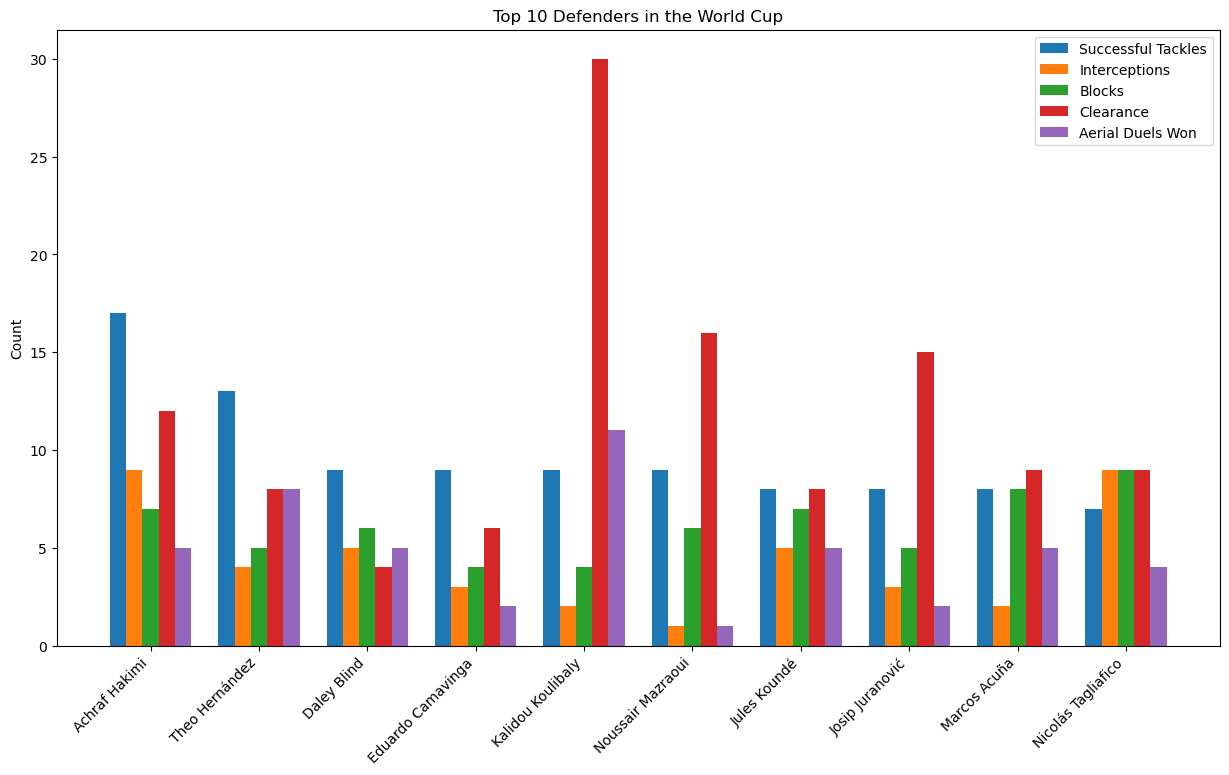

In [20]:
# Now let's find out Top 10 defenders based on their defensive attributes
defenders = df[df['Pos'] == 'DF']
top_defenders = defenders.nlargest(10, ['successful_tackles', 'interceptions', 'Blocks', 'clearence', 'aerial_duo_won'], keep='all')

# Created a grouped bar chart below:
labels = top_defenders['Player']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - 2 * width, top_defenders['successful_tackles'], width, label='Successful Tackles')
rects2 = ax.bar(x - width, top_defenders['interceptions'], width, label='Interceptions')
rects3 = ax.bar(x, top_defenders['Blocks'], width, label='Blocks')
rects4 = ax.bar(x + width, top_defenders['clearence'], width, label='Clearance')
rects5 = ax.bar(x + 2 * width, top_defenders['aerial_duo_won'], width, label='Aerial Duels Won')

ax.set_ylabel('Count')
ax.set_title('Top 10 Defenders in the World Cup')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.show()


# Successful tackles, Interceptions, Blocks, Clearance and Aerial duo won are taken as defenders attribute. I choose stacked bar plots here because it is simple and easy to interpret and yet powerful visualization.
# Achraf Hakimi, Theo Hernandez and Daley Blind were some fantastic defenders in the world cup

In [21]:
top_defenders = top_defenders.drop(columns = 'Unnamed: 0')
top_defenders = top_defenders.reset_index()
top_defenders = top_defenders.drop(columns = 'index')

In [22]:
top_defenders = top_defenders[["Player", "successful_tackles", "interceptions", "Blocks", "clearence", "aerial_duo_won"]]
top_defenders

Player  successful_tackles  interceptions  Blocks  clearence  \
0       Achraf Hakimi                  17              9     7.0       12.0   
1      Theo Hernández                  13              4     5.0        8.0   
2         Daley Blind                   9              5     6.0        4.0   
3   Eduardo Camavinga                   9              3     4.0        6.0   
4   Kalidou Koulibaly                   9              2     4.0       30.0   
5   Noussair Mazraoui                   9              1     6.0       16.0   
6        Jules Koundé                   8              5     7.0        8.0   
7     Josip Juranović                   8              3     5.0       15.0   
8        Marcos Acuña                   8              2     8.0        9.0   
9  Nicolás Tagliafico                   7              9     9.0        9.0   

   aerial_duo_won  
0             5.0  
1             8.0  
2             5.0  
3             2.0  
4            11.0  
5             1.0  
6             5.0  
7             2.0  
8             5.0  
9             4.0

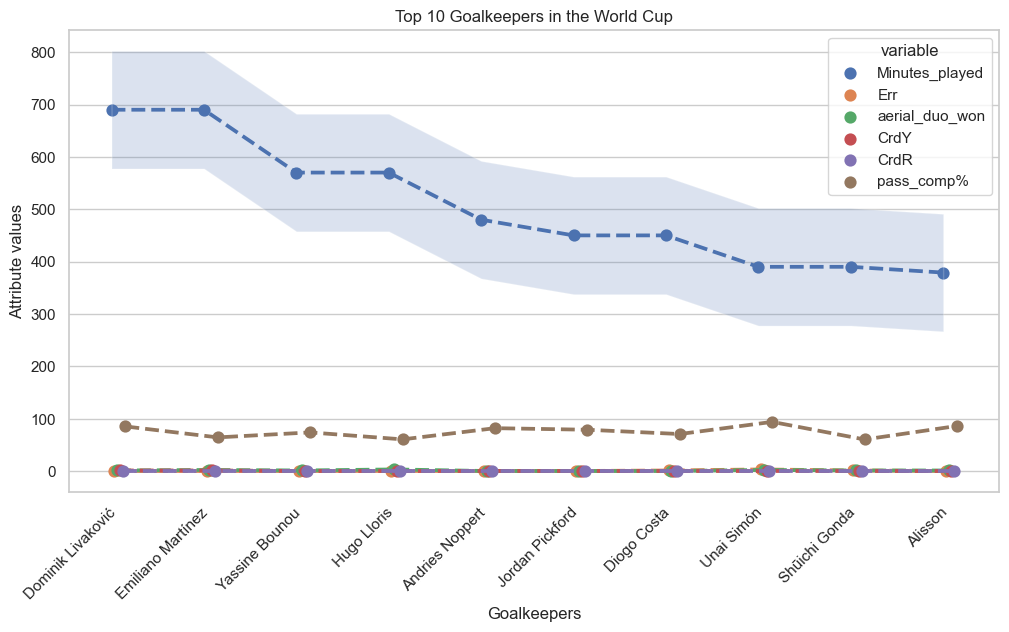

In [23]:
# Let's find out top 10 Goalkeepers
goalkeepers = df[df['Pos'] == 'GK']
top_goalkeepers = goalkeepers.nlargest(10, ['Minutes_played', 'pass_comp%', 'Err', 'aerial_duo_won', 'CrdY', 'CrdR'], keep='all')

# Melted the data frame to a long format for pointplot
melted_data = pd.melt(top_goalkeepers, id_vars=['Player'], value_vars=['Minutes_played', 'Err', 'aerial_duo_won', 'CrdY', 'CrdR', 'pass_comp%'])

# Created a pointplot below:

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.pointplot(data=melted_data, x='Player', y='value', hue='variable', palette="deep", linestyles="--", dodge=True)

for line, name in zip(ax.lines, melted_data['variable'].unique()):
    y = line.get_ydata()
    ax.fill_between(x=line.get_xdata(), y1=y - np.std(y), y2=y + np.std(y), alpha=0.2)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Attribute values')
ax.set_xlabel('Goalkeepers')
ax.set_title('Top 10 Goalkeepers in the World Cup')

def onclick(event):
    if event.inaxes == ax:
        for point in ax.collections:
            if point.contains(event)[0]:
                index = point.get_offsets()[point.contains(event)[1]]['ind'][0]
                x = point.get_offsets()[0][0]
                y = point.get_offsets()[0][1]
                player = ax.get_xticklabels()[int(x)].get_text()
                attribute = melted_data['variable'].unique()[point.get_array().index(point.get_sizes()[index])]
                value = y
                print(f"Player: {player}, Attribute: {attribute}, Value: {value}")

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.show()



# Now while finding out the top goalkeepers, I took Minute played, Error, aerial duo won, number of red and yellow cards and passes completed as attributes as those indicated the longer playing capabilities, less error prone and discipline of a goalkeeper. I choose line plots here because it is simple and easy to interpret.Dominik Livakovic and Emiliano Martinez dominated the competition of being the best goalkeepers in the world cup.


# Does Age matters in Football? This is a long-discussed question amongst the football fans. Football is a physically demanding game where Age must have a meaningful contribution. But we saw many players have played for longer in their career even in their late 30s also. I first plotted a box plot and a bar chart to see the Age distribution in all the teams.


(array([15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

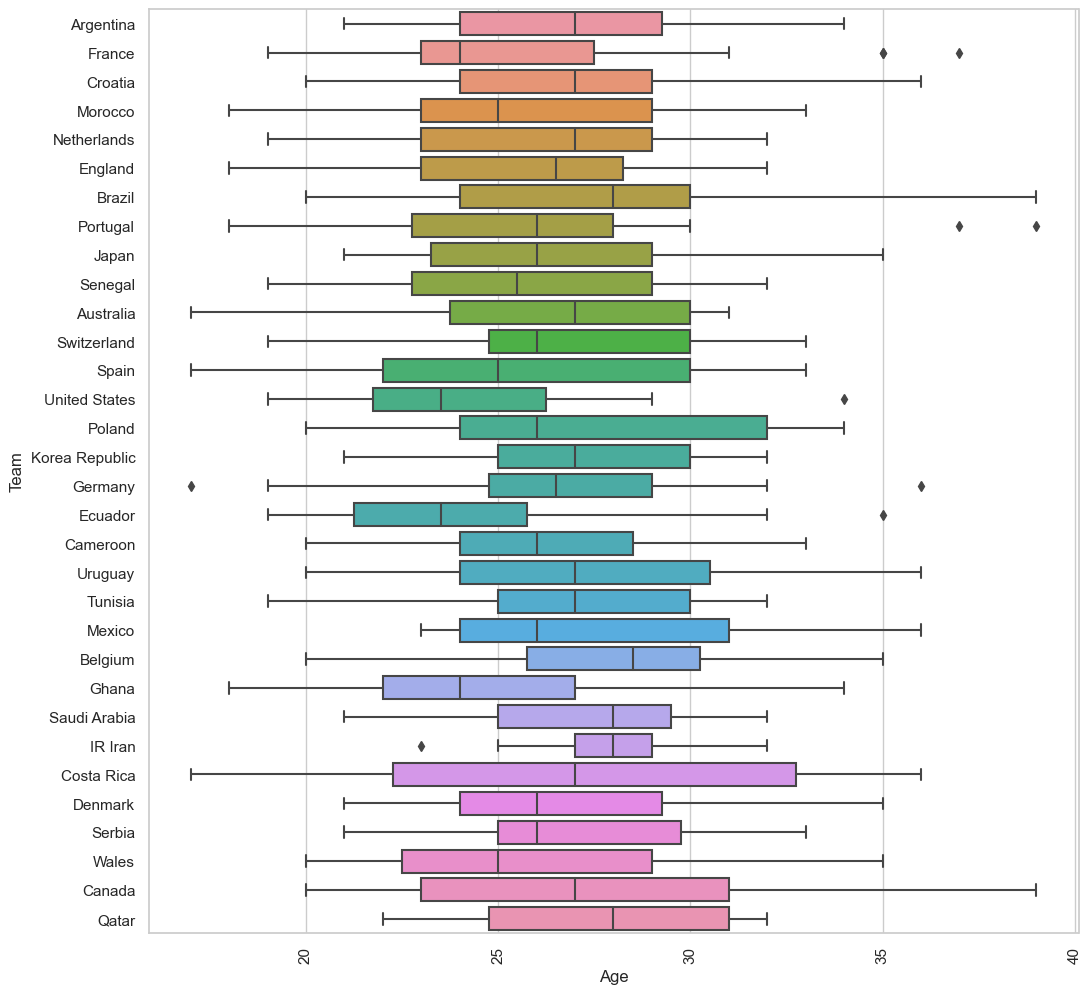

In [24]:
# Created a box plot:
plt.figure(figsize = (12,12))
sns.boxplot(x = 'Age', y = 'Team', data = df)
plt.xticks(rotation = 90)

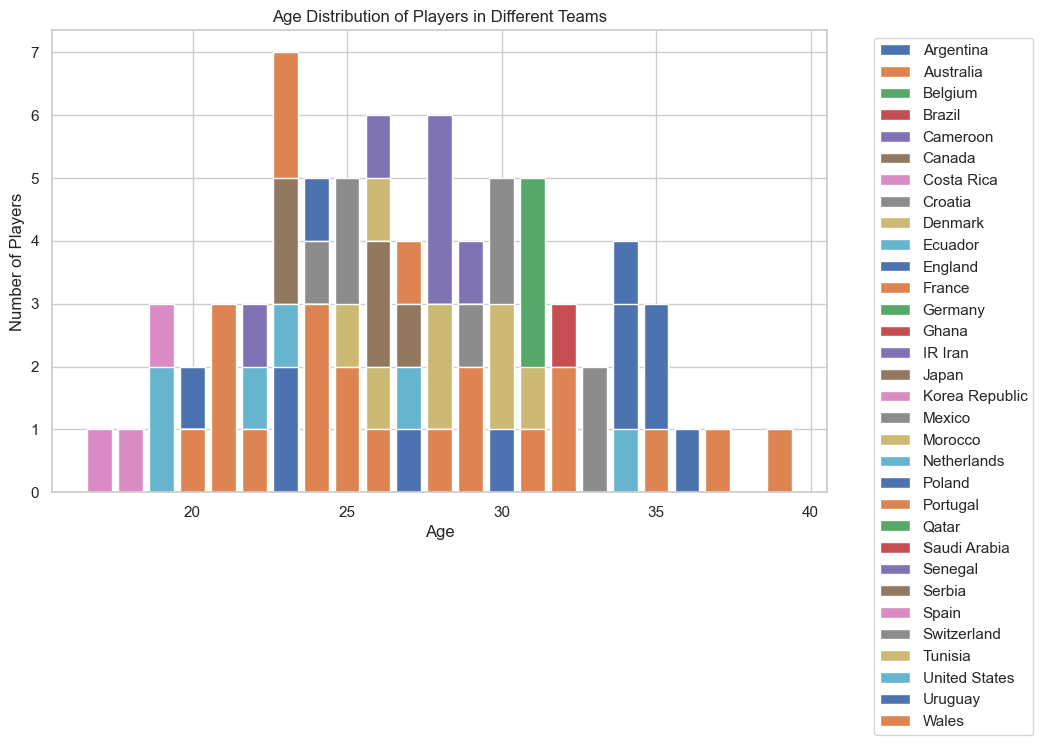

In [25]:
# Now I wanted to group the data by "Team" and "Age", and count the number of players in each group
age_distribution = df.groupby(['Team', 'Age'])['Player'].count().reset_index(name='Count')

# Created a bar chart of the age distribution for each team
fig, ax = plt.subplots(figsize=(10, 6))
for team in age_distribution['Team'].unique():
    team_data = age_distribution[age_distribution['Team'] == team]
    ax.bar(team_data['Age'], team_data['Count'], label=team)

ax.set_title('Age Distribution of Players in Different Teams')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Players')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [26]:
age_distribution

Team  Age  Count
0    Argentina   21      2
1    Argentina   22      1
2    Argentina   23      2
3    Argentina   24      5
4    Argentina   25      1
..         ...  ...    ...
364      Wales   28      1
365      Wales   29      2
366      Wales   31      1
367      Wales   32      2
368      Wales   35      1

[369 rows x 3 columns]

In [27]:
# Finding out the top 10 countries with the most players in the youngest age group
age_younger = age_distribution[age_distribution['Age'] == age_distribution['Age'].min()].sort_values('Count', ascending=False).head(10)
age_younger

Team  Age  Count
10    Australia   17      1
66   Costa Rica   17      1
141     Germany   17      1
299       Spain   17      1

In [28]:
# Grouped the data by "Team" and calculate the mean age for each group
team_mean_age = df.groupby('Team')['Age'].mean()

# Sorted the mean age by ascending order and select the top 10 teams
top_10_youngest_teams = team_mean_age.sort_values().head(10)

print(top_10_youngest_teams)


Team
United States    24.100000
Ecuador          24.277778
Ghana            24.950000
Spain            25.523810
Senegal          25.800000
Morocco          25.840000
France           25.875000
Portugal         25.958333
Netherlands      26.047619
Wales            26.055556
Name: Age, dtype: float64


In [29]:
# Similarly finding out the oldest group
top_10_oldest_teams = team_mean_age.sort_values(ascending = False).head(10)
print(top_10_oldest_teams)

Team
IR Iran           28.047619
Belgium           27.950000
Mexico            27.666667
Uruguay           27.631579
Qatar             27.600000
Brazil            27.500000
Canada            27.368421
Korea Republic    27.333333
Croatia           27.238095
Saudi Arabia      27.130435
Name: Age, dtype: float64


In [30]:
youngest_teams_df = pd.DataFrame({'Team': top_10_youngest_teams.index, 'Age': top_10_youngest_teams.values})

youngest_teams_df

Team        Age
0  United States  24.100000
1        Ecuador  24.277778
2          Ghana  24.950000
3          Spain  25.523810
4        Senegal  25.800000
5        Morocco  25.840000
6         France  25.875000
7       Portugal  25.958333
8    Netherlands  26.047619
9          Wales  26.055556

In [31]:
oldest_teams_df = pd.DataFrame({'Team': top_10_oldest_teams.index, 'Age': top_10_oldest_teams.values})
oldest_teams_df

Team        Age
0         IR Iran  28.047619
1         Belgium  27.950000
2          Mexico  27.666667
3         Uruguay  27.631579
4           Qatar  27.600000
5          Brazil  27.500000
6          Canada  27.368421
7  Korea Republic  27.333333
8         Croatia  27.238095
9    Saudi Arabia  27.130435

In [32]:


# The total number of goals scored by the 10 youngest teams
youngest_teams_goals = df[df['Team'].isin(top_10_youngest_teams.index)].groupby('Team')['Gls'].sum().reset_index(name='Total Goals')

# The total number of goals scored by the 10 oldest teams is:
oldest_teams_goals = df[df['Team'].isin(top_10_oldest_teams.index)].groupby('Team')['Gls'].sum().reset_index(name='Total Goals')

# Now Calculating the total Shots by the top 10 youngest teams
youngest_teams_shots = df[df['Team'].isin(top_10_youngest_teams.index)].groupby('Team')['Shots'].sum().reset_index(name = 'Total Shots')

# Now Calculating the total Shots by the top 10 youngest teams
oldest_teams_shots = df[df['Team'].isin(top_10_oldest_teams.index)].groupby('Team')['Shots'].sum().reset_index(name = 'Total Shots')

# Created a 3x2 grid of subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=('10 Youngest Teams by Mean Age', '10 Oldest Teams by Mean Age',
                                                     'Total Goals Scored by 10 Youngest Teams', 'Total Goals Scored by 10 Oldest Teams', 'Total Shots attemped by the top 10 youngest teams', 'Total Shots attemped by the top 10 oldest teams'))


fig.add_trace(px.bar(youngest_teams_df, x='Team', y='Age', title='10 Youngest Teams by Mean Age').data[0], row=1, col=1)
fig.update_xaxes(title_text='Team', row=1, col=1)
fig.update_yaxes(title_text='Mean Age', range=[20, 30], row=1, col=1) # set y-axis range to 20-30
fig.update_traces(hovertemplate='Team: %{x}<br>Mean Age: %{y}', selector=dict(type='bar'))
fig.update_layout(xaxis_tickangle=-45)


fig.add_trace(px.bar(oldest_teams_df, x='Team', y='Age', title='10 Oldest Teams by Mean Age').data[0], row=1, col=2)
fig.update_xaxes(title_text='Team', row=1, col=2)
fig.update_yaxes(title_text='Mean Age', range=[20, 30], row=1, col=2) # set y-axis range to 20-30
fig.update_traces(hovertemplate='Team: %{x}<br>Mean Age: %{y}', selector=dict(type='bar'))
fig.update_layout(xaxis_tickangle=-45)

fig.add_trace(px.scatter(youngest_teams_goals, x='Team', y='Total Goals', title='Total Goals Scored by 10 Youngest Teams').data[0], row=2, col=1)
fig.update_xaxes(title_text='Team', row=2, col=1)
fig.update_yaxes(title_text='Total Goals', row=2, col=1)
fig.update_traces(hovertemplate='Team: %{x}<br>Total Goals: %{y}', selector=dict(type='scatter'))

fig.add_trace(px.scatter(oldest_teams_goals, x='Team', y='Total Goals', title='Total Goals Scored by 10 Oldest Teams').data[0], row=2, col=2)
fig.update_xaxes(title_text='Team', row=2, col=2)
fig.update_yaxes(title_text='Total Goals', row=2, col=2)
fig.update_traces(hovertemplate='Team: %{x}<br>Total Goals: %{y}', selector=dict(type='scatter'))

fig.add_trace(px.scatter(youngest_teams_shots, x='Team', y='Total Shots', title='Total Shots attempted by 10 youngest Teams').data[0], row=3, col=1)
fig.update_xaxes(title_text='Team', row=3, col=1)
fig.update_yaxes(title_text='Total Shots Attempted', row=3, col=1)
fig.update_traces(hovertemplate='Team: %{x}<br>Total Shots: %{y}', selector=dict(type='scatter'))

fig.add_trace(px.scatter(oldest_teams_shots, x='Team', y='Total Shots', title='Total Shots attempted by 10 Oldest Teams').data[0], row=3, col=2)
fig.update_xaxes(title_text='Team', row=3, col=2)
fig.update_yaxes(title_text='Total Shots Attempted', row=3, col=2)
fig.update_traces(hovertemplate='Team: %{x}<br>Total Shots: %{y}', selector=dict(type='scatter'))

fig.update_layout(height=1000, width=1000, title='Subplots of Team Stats', showlegend=False)

fig.show()

# I found out the top 10 youngest and 10 most old teams, then plotted line plots to see total goals scored and total attempted shots by the youngest and oldest teams by mean age to compare them against the bar plots of ages to see which portion performs better. Found out the younger teams like France outperformed the oldest and experienced teams like Brazil or Belgium which indicates that Age matters in Football.
